In [1]:
from pathlib import Path
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [20]:
legpath=Path("./legs")
headpath=Path(".head")
legs=[]
heads=[]

legs_dict=[]
heads_dict=[]

legs_dict_desc=[]
heads_dict_desc=[]

        
def myLegsFunc():
    for leg in glob.glob("legs/*.jpg"):
        img = Image.open(str(leg))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '0']
        legs_dict_desc.append(0)
        legs_dict.append(np.array(convert_np))
        legs.append(csv_format_img)
        #plt.imshow(np.array(convert_np))
        #plt.show()


def myHeadsFunc():
    for head in glob.glob("head/*.jpg"):
        img = Image.open(str(head))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '1']
        heads_dict_desc.append(1)
        heads_dict.append(np.array(convert_np))
        heads.append(csv_format_img)
        #plt.imshow(np.array(convert_np))
        #plt.show()
    
myHeadsFunc()
myLegsFunc()


legs_head_dict=legs_dict+ heads_dict
legs_head_dict_desc=legs_dict_desc+ heads_dict_desc
appData=zip(np.array(legs_head_dict,dtype='uint8'),np.array(legs_head_dict_desc,dtype='uint8'))
appData2= tuple(((np.array(legs_head_dict,dtype='uint8')),np.array(legs_head_dict_desc,dtype='uint8')))
#appData2=((appData2),(appData2))
#len(appData)
print(type(appData2[0]))
#print(appData2)
#print(len(appData2[0]))
X_train, X_test, y_train, y_test = train_test_split(legs_head_dict, legs_head_dict_desc, test_size=0.30, random_state=101)


appData1=tuple(((np.array(X_train,dtype='uint8')),np.array(y_train,dtype='uint8')))
appData3=tuple(((np.array(X_test,dtype='uint8')),np.array(y_test,dtype='uint8')))
appData2=((appData1),(appData3))
(train_images,train_labels),(test_images, test_labels)=appData2
print(len(train_images))
class_names=["leg","head"]

<class 'numpy.ndarray'>
55


In [3]:

#print(np.array(train_images[7]))
test_labels

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1], dtype=uint8)

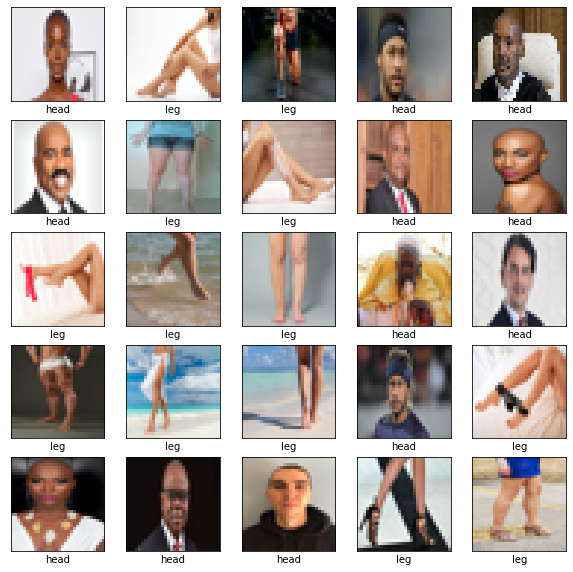

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], )
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [5]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(200, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 200)       5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        115264    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 157,792
Trainable params: 157,792
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 200)       5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        115264    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
2/2 [==============================] - 0s 234ms/step - loss: 0.5708 - accuracy: 0.8909 - val_loss: 2.1336 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 0s 112ms/step - loss: 0.9080 - accuracy: 0.7636 - val_loss: 0.9536 - val_accuracy: 0.7500
Epoch 3/10
2/2 [==============================] - 0s 94ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.6614 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 0s 98ms/step - loss: 0.0880 - accuracy: 0.9636 - val_loss: 1.9646 - val_accuracy: 0.5833
Epoch 5/10
2/2 [==============================] - 0s 106ms/step - loss: 0.2468 - accuracy: 0.8727 - val_loss: 1.7195 - val_accuracy: 0.5833
Epoch 6/10
2/2 [==============================] - 0s 98ms/step - loss: 0.0825 - accuracy: 0.9818 - val_loss: 1.3253 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 0s 96ms/step - loss: 0.0346 - accuracy: 0.9818 - val_loss: 0.8537 - val_accuracy: 0.6250
Epoch 8/10
2/2 [========

1/1 - 0s - loss: 2.0961 - accuracy: 0.6250


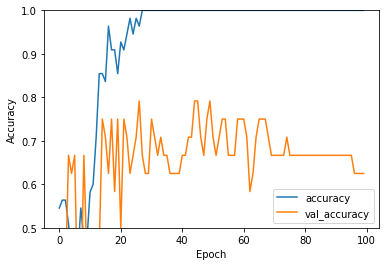

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [27]:
test_loss,test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Accuracy is ", test_acc)

1/1 - 0s - loss: 2.0961 - accuracy: 0.6250
Accuracy is  0.625


In [12]:
prediction=model.predict(test_images)
print(np.argmax(prediction[3]))

0


0


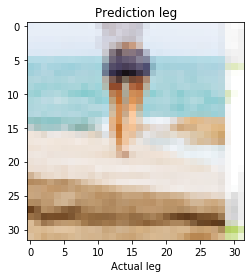

In [28]:

plt.grid(False)
plt.imshow(test_images[2])
print(test_labels[2])
plt.xlabel("Actual "+ class_names[test_labels[2]])
plt.title("Prediction "+ class_names[np.argmax(prediction[2])])
plt.show()


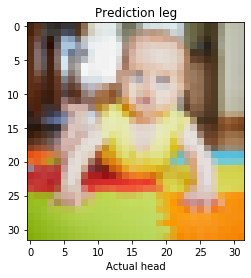

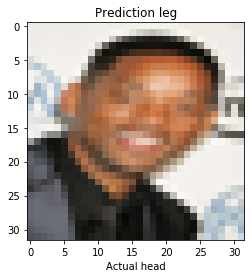

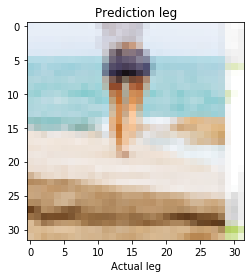

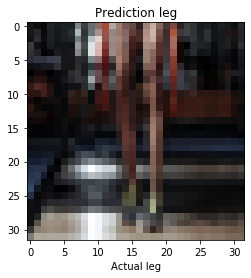

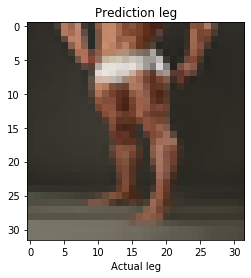

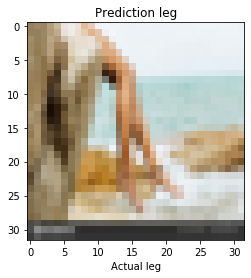

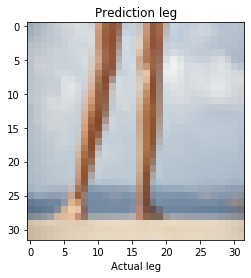

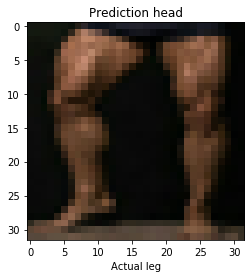

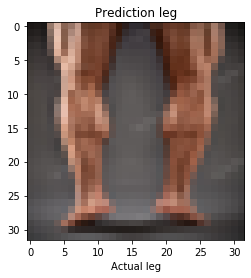

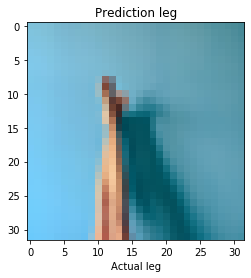

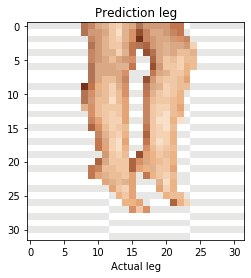

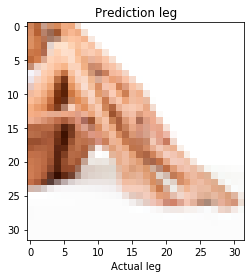

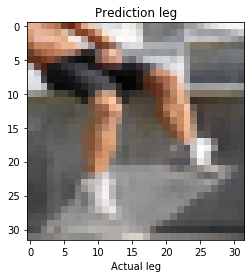

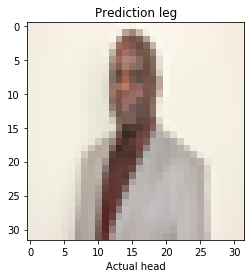

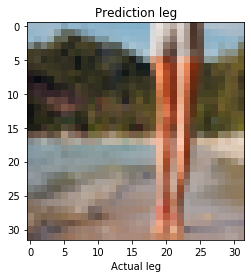

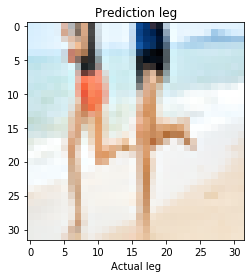

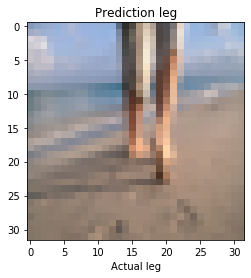

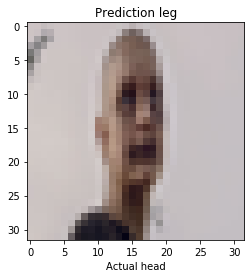

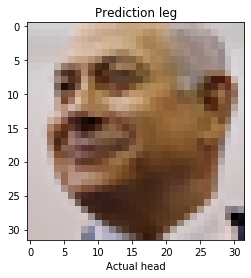

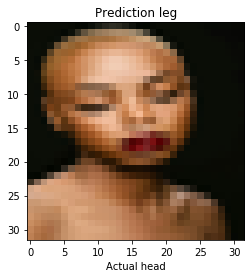

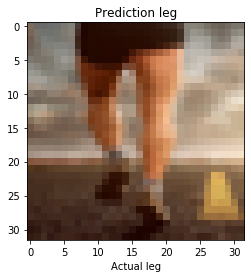

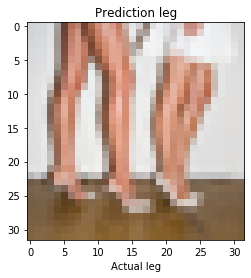

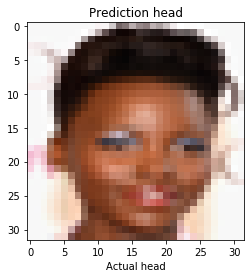

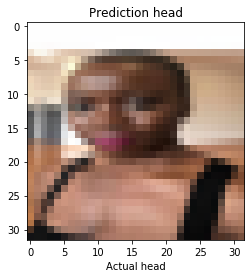

In [33]:
for i in range(len(test_images)):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual "+ class_names[test_labels[i]])
    plt.title("Prediction "+ class_names[np.argmax(prediction[i])])
    plt.show()